In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # k-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np

num_clusters = 3
num_points = 100
data_points = np.empty((num_clusters*num_points, 2))
param_clusters = np.empty((num_clusters, 4))
lab = np.empty((num_clusters*num_points, 1))

# Choose random parameters (x0, y0, sigma_x, sigma_y) 
np.random.seed(0)
param_clusters[:, 0:2] = np.random.rand(num_clusters, 2)
param_clusters[:, 2:] = 0.05*np.random.rand(num_clusters, 2)

# Sample standard normal distribution
data_points[:, 0:2] = np.random.randn(num_clusters*num_points, 2)

# Adjust to parameters
for i in range(num_clusters):

    # range
    j = range(num_points*i, num_points*(i + 1))

    # assign label
    lab[j] = i

    # stretch by sigma_x, sigma_y
    data_points[j, 0] = data_points[j, 0]*param_clusters[i, 2]
    data_points[j, 1] = data_points[j, 1]*param_clusters[i, 3]

    # move by x0, y0
    data_points[j, 0] = data_points[j, 0] + param_clusters[i, 0]
    data_points[j, 1] = data_points[j, 1] + param_clusters[i, 1]


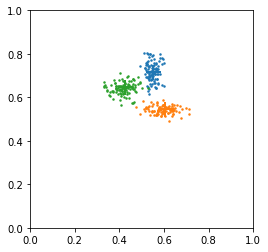

In [2]:
# Plot data
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
for i in range(num_clusters):
    
    _ = ax.plot(param_clusters[i, 0], param_clusters[i, 1], linestyle = 'none', marker = '+', markersize = 15, mec = f'C{i}', mew = 2)

    j, _ = np.where(lab == i)
    _ = ax.plot(data_points[j, 0], data_points[j, 1], linestyle = 'none', marker = '.', markersize = 5, mec = 'none', mfc = f'C{i}')

_ = ax.set_xlim(0, 1)
_ = ax.set_ylim(0, 1)


In [3]:
# k-means clustering
def k_means(data_points, K, num_steps):

    num_points = data_points.shape[0]
    lab = np.empty((num_points, num_steps))

    # initialize
    k_centres = np.empty((num_steps, K))
    dist = np.empty((num_points, K))
    
    for i in range(num_steps):

        # initialize k centres
        if i == 0:
            k_centres[0, :] = np.random.randint(0, num_points + 1, size = (1, K))
        
        # choose cluster means as k centres
        else:
            for k in range(K):
                j = np.where(lab[:, i - 1] == k)
                v = np.mean(data_points[j[0], :], axis = 0)
                k_centres[i, k] = np.argmin(np.linalg.norm(data_points - v, axis = 1), axis = 0)

        # calculate point-centre distances
        for k in range(K):
            dist[:, k] = np.linalg.norm(data_points - data_points[int(k_centres[i, k]), :], axis = 1)

        # label by nearest centre    
        lab[:, i] = np.argmin(dist, axis = 1)                

    
    # plot results
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

    # initial clusters
    for k in range(K):
        
        p = data_points[int(k_centres[0, k]), :]
        _ = ax[0].plot(p[0], p[1], linestyle = 'none', marker = '+', markersize = 15, mec = f'C{k}', mew = 2)

        j = np.where(lab[:, 0] == k)
        _ = ax[0].plot(data_points[j, 0], data_points[j, 1], linestyle = 'none', marker = '.', markersize = 5, mec = 'none', mfc = f'C{k}')

    _ = ax[0].set_xlim(0, 1)
    _ = ax[0].set_ylim(0, 1)
    _ = ax[0].set_title('Initial')

    # final clusters
    for k in range(K):

        p = data_points[int(k_centres[num_steps - 1, k]), :]
        _ = ax[1].plot(p[0], p[1], linestyle = 'none', marker = '+', markersize = 15, mec = f'C{k}', mew = 2)

        j = np.where(lab[:, num_steps - 1] == k)
        _ = ax[1].plot(data_points[j, 0], data_points[j, 1], linestyle = 'none', marker = '.', markersize = 5, mec = 'none', mfc = f'C{k}')

    _ = ax[1].set_xlim(0, 1)
    _ = ax[1].set_ylim(0, 1)
    _ = ax[1].set_title('Final')


    return lab, k_centres


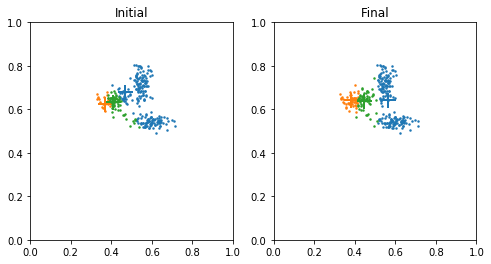

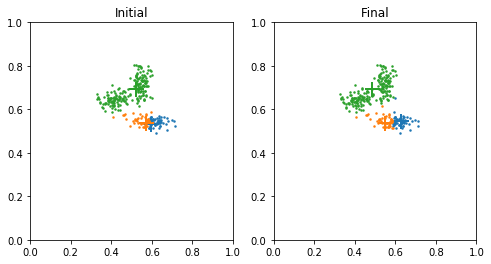

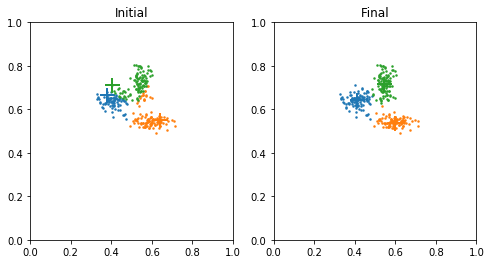

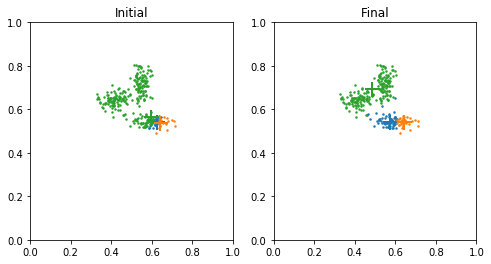

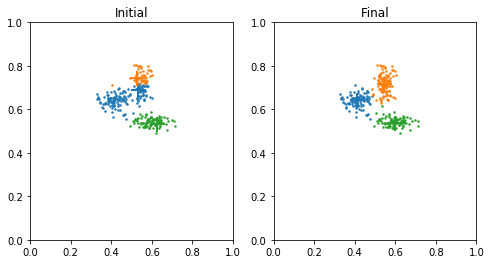

In [4]:
for i in range(5):
    lab_, k_centres = k_means(data_points, 3, 10)
